In [15]:

import numpy as np
import os
#import tensorflow as tf
import pandas as pd
#from Demo_test import *
import matplotlib.pyplot as plt



In [ ]:

def getPartStats(formatVector,parts_array):
    mass = []
    comp = []
    stress = []

    for i in range(len(parts_array)):

        #stress,compliance = testFenicsPart(parts_array[i],formatVector)
        mass.append(np.sum(parts_array[i],axis=parts_array[i].shape))
        comp.append(-1)
        stress.append(-1)
    
    return mass,comp,stress
        


In [ ]:

def getBestImage(predictedImages,shiftIndexes,formatVector):

    actualImages = []
    subImages = predictedImages[-1].shape[0]
    for i in range(subImages):
        shiftX = shiftIndexes[i][0]
        shiftY = shiftIndexes[i][1]

        #print("{}:({},{})".format(i,shiftX,shiftY))
        part = predictedImages[-1][i,:,:,:]
        part = np.reshape(part,(101,51))
        part = shiftImage(part,-shiftX,-shiftY)
        actualImages.append(part)

    C_max, S_max = formatVector[6], formatVector[7]
    mass_array,compliance_array,stress_array = getPartStats(formatVector,actualImages)

    #the best part is the part with no stress of compliance violation with the least mass
    # if all parts break the constraints, then return the part with the best score
    scores = []
    possibleParts = []
    for i in range(len(actualImages)):
        if(compliance_array[i] <= C_max and stress_array[i] <=S_max):
            possibleParts.append(i)
        score = mass_array[i] + np.exp(compliance_array[i]/C_max) + np.exp(stress_array[i]/S_max) - np.exp(2)
        scores.append(score)
    
    if(len(possibleParts) >= 1):
        minMass = np.inf
        index = 0
        for i in possibleParts:
            if(mass_array[i] < minMass):
                index = i
                minMass = mass_array[i]
        
        return mass_array[index],compliance_array[index],stress_array[index]
    
    else:
        minScore = np.argsort(scores)
        index = minScore[0]

        return mass_array[index],compliance_array[index],stress_array[index]


In [ ]:



def buildDataframe(path):
    """
    Given a path to data, construct a pandas dataframe with the load condtions and part stats
    Then use the ml model and take some more stats and post them to the data frame.

    We can then use the data frame to see what values give good parts.
    """

    columns = ["nelx","nely","did converge","Youngs modulus",
               "circle 1 x","circle 1 y","circle 1 radius","force 1 x","force 1 y",
               "circle 2 x","circle 2 y","circle 2 radius","force 1 x","force 2 y",
               "circle 3 x","circle 3 y","circle 3 radius","force 3 x","force 3 y",
               "True Mass","True Compliance","True Stress",
               "Predicted Mass","Predicted Stress","Predicted Compliance"]
    
    df = pd.DataFrame(columns=columns)
    model = getModel(100,50)

    pointsToGrab = os.listdir(path)[:5]
    for fileName in pointsToGrab:
        dataPath = os.path.join(path,fileName)
        formatVector,part,converged = loadFenicPart(dataPath)

        circles = formatVector[0]
        radii = formatVector[1]
        forces = formatVector[2]
        nelx, nely = formatVector[3], formatVector[4]
        Y, C_max, S_max = formatVector[5], formatVector[6], formatVector[7]

        PredictedImages,shiftIndexes = iteratePartWithShift(model,formatVector.copy(),shiftAmnt=3)

        predMass,predCompliance,predStress = getBestImage(PredictedImages,shiftIndexes,formatVector)

        mass = np.sum(part,axis=part.shape)

        newFrame = {"nelx": nelx,"nely": nely,"did converge":converged,"Youngs modulus":Y,
               "circle 1 x":circles[0][0],"circle 1 y":circles[1][0],"circle 1 radius":radii[0],"force 1 x":forces[0][0],"force 1 y":forces[1][0],
               "circle 2 x":circles[0][1],"circle 2 y":circles[1][1],"circle 2 radius":radii[1],"force 1 x":forces[0][1],"force 2 y":forces[1][1],
               "circle 3 x":circles[0][2],"circle 3 y":circles[1][2],"circle 3 radius":radii[2],"force 3 x":forces[0][2],"force 3 y":forces[1][2],
               "True Mass":mass,"True Compliance":C_max,"True Stress":S_max,
               "Predicted Mass":predMass,"Predicted Stress":predCompliance,"Predicted Compliance":predStress}
        df.append(newFrame)
    
    return df



In [14]:

path = r"E:\TopoptGAfileSaves\Mass minimization\100_50_Validation"


In [ ]:
"""
Given a path to data, construct a pandas dataframe with the load condtions and part stats
Then use the ml model and take some more stats and post them to the data frame.

We can then use the data frame to see what values give good parts.
"""

columns = ["nelx","nely","did converge","Youngs modulus",
            "circle 1 x","circle 1 y","circle 1 radius","force 1 x","force 1 y",
            "circle 2 x","circle 2 y","circle 2 radius","force 1 x","force 2 y",
            "circle 3 x","circle 3 y","circle 3 radius","force 3 x","force 3 y",
            "True Mass","True Compliance","True Stress",
            "Predicted Mass","Predicted Stress","Predicted Compliance"]




In [ ]:

#model = getModel(100,50)
frameData = []
pointsToGrab = os.listdir(path)[:25]
for i,fileName in enumerate(pointsToGrab):
    print("{:.2f}%\t".format(i/len(pointsToGrab)),end='\r')
    dataPath = os.path.join(path,fileName)
    formatVector,part,converged = loadFenicPart(dataPath)

    circles = formatVector[0]
    radii = formatVector[1]
    forces = formatVector[2]
    nelx, nely = formatVector[3], formatVector[4]
    Y, C_max, S_max = formatVector[5], formatVector[6], formatVector[7]

    #PredictedImages,shiftIndexes = iteratePartWithShift(model,formatVector.copy(),shiftAmnt=3)

    predMass,predCompliance,predStress = 5151,-1,-1#getBestImage(PredictedImages,shiftIndexes,formatVector)

    mass = np.sum(part)

    """newFrame = {"nelx": nelx,"nely": nely,"did converge":converged,"Youngs modulus":Y,
            "circle 1 x":circles[0][0],"circle 1 y":circles[1][0],"circle 1 radius":radii[0],"force 1 x":forces[0][0],"force 1 y":forces[1][0],
            "circle 2 x":circles[0][1],"circle 2 y":circles[1][1],"circle 2 radius":radii[1],"force 1 x":forces[0][1],"force 2 y":forces[1][1],
            "circle 3 x":circles[0][2],"circle 3 y":circles[1][2],"circle 3 radius":radii[2],"force 3 x":forces[0][2],"force 3 y":forces[1][2],
            "True Mass":mass,"True Compliance":C_max,"True Stress":S_max,
            "Predicted Mass":predMass,"Predicted Stress":predCompliance,"Predicted Compliance":predStress}"""
    
    newFrame = [nelx, nely,converged,Y,
                circles[0][0],circles[1][0],radii[0],forces[0][0],forces[1][0],
                circles[0][1],circles[1][1],radii[1],forces[0][1],forces[1][1],
                circles[0][2],circles[1][2],radii[2],forces[0][2],forces[1][2],
                mass,C_max,S_max,
                predMass,predCompliance,predStress]
    frameData.append(newFrame)
print("100%     ")


In [ ]:
print(frameData)
df = pd.DataFrame(frameData,columns=columns)


In [5]:
df = pd.read_csv("dataFull.csv")

In [ ]:

df2 = pd.read_csv("data8.csv")
df = df.append(df2,ignore_index=True)

In [ ]:
print(df)

In [ ]:
df.to_csv('DataFull.csv')

In [6]:
"""
Take the dataframe created and perform PCA on the format vector portion of the dataframe
"""
columns = ["nelx","nely","did converge","Youngs modulus",
            "circle 1 x","circle 1 y","circle 1 radius","force 1 x","force 1 y",
            "circle 2 x","circle 2 y","circle 2 radius","force 2 x","force 2 y",
            "circle 3 x","circle 3 y","circle 3 radius","force 3 x","force 3 y",
            "True Mass","True Compliance","True Stress",
            "Predicted Mass","Predicted Stress","Predicted Compliance"]

columnsToPCA = columns[:20]

matrix = df[columnsToPCA].to_numpy(dtype='float32')
matrix = matrix.T



In [7]:
print(matrix.shape)

(20, 68)


In [8]:
u,s,v_t = np.linalg.svd(matrix)

error2D = np.sum(s[3:])
error3D = np.sum(s[4:])

print("PCA error for 2D representation: ",error2D)
print("PCA error for 3D representation: ",error3D)




PCA error for 2D representation:  112466.875
PCA error for 3D representation:  47425.844


In [9]:
print(df)

    Unnamed: 0  Unnamed: 0.1  nelx  nely  did converge  Youngs modulus  \
0            0             0   100    50          True    4.875917e+11   
1            1             1   100    50          True    1.740391e+11   
2            2             2   100    50          True    1.641388e+11   
3            3             3   100    50          True    1.304148e+11   
4            4             4   100    50          True    1.587046e+11   
..         ...           ...   ...   ...           ...             ...   
63          63            54   100    50          True    2.288451e+11   
64          64            55   100    50          True    2.948529e+11   
65          65            56   100    50          True    4.458879e+11   
66          66            57   100    50          True    1.001168e+11   
67          67            58   100    50          True    1.266910e+11   

    circle 1 x  circle 1 y  circle 1 radius    force 1 x  ...  circle 3 y  \
0         0.30        0.77        

In [36]:
pca2D = u[:,:3].T

print(pca2D.shape)

pcaCoords = np.zeros((3,len(df.index)))
forceCoords = np.zeros((3,len(df.index)))
distCoords = np.zeros((3,len(df.index)))
parameterCoords = np.zeros((3,len(df.index)))


status = []
legend = []
for i in range(len(df.index)):
    #print(df.iloc[i])
    vec = df.iloc[i][columnsToPCA].to_numpy(dtype='float32')
    vec = np.reshape(vec,(len(vec),1))
    #print(vec.shape)

    twodimOutput = np.reshape(pca2D @ vec,3)
    #print(twodimOutput)
    pcaCoords[0,i] = twodimOutput[0]
    pcaCoords[1,i] = twodimOutput[1]
    pcaCoords[2,i] = twodimOutput[2]


    compliance = df.iloc[i]['True Compliance']
    stress = df.iloc[i]['True Stress']
    predStress = df.iloc[i]['Predicted Compliance']#stress and compliance got swaped in saving. correcting them here
    predCompliance = df.iloc[i]['Predicted Stress']
    force1_x = df.iloc[i]['force 1 x']

    c_constraint = compliance >= predCompliance
    s_constraint = stress >= predStress


    #magnitude of force applied to each circle
    forceCoords[0,i] = np.sqrt((df.iloc[i]['force 1 x'] ** 2) + (df.iloc[i]['force 1 y'] ** 2))
    forceCoords[1,i] = np.sqrt((df.iloc[i]['force 1 x.1'] ** 2) + (df.iloc[i]['force 2 y'] ** 2))
    forceCoords[2,i] = np.sqrt((df.iloc[i]['force 3 x'] ** 2) + (df.iloc[i]['force 3 y'] ** 2))

    #Distance from each circle to the next
    distCoords[0,i] = np.sqrt((df.iloc[i]['circle 1 x'] - df.iloc[i]['circle 2 x'])** 2 + (df.iloc[i]['circle 1 y']- df.iloc[i]['circle 2 y'])** 2)
    distCoords[1,i] = np.sqrt((df.iloc[i]['circle 2 x'] - df.iloc[i]['circle 3 x'])** 2 + (df.iloc[i]['circle 2 y']- df.iloc[i]['circle 3 y'])** 2)
    distCoords[2,i] = np.sqrt((df.iloc[i]['circle 3 x'] - df.iloc[i]['circle 1 x'])** 2 + (df.iloc[i]['circle 3 y']- df.iloc[i]['circle 1 y'])** 2)

    
    #YOungs s_max, c_max
    parameterCoords[0,i] = compliance
    parameterCoords[1,i] = stress
    parameterCoords[2,i] = df.iloc[i]['Youngs modulus']

    #print("Stress: {} >= {} = {}".format(stress,predStress,s_constraint))
    #print("Comp.: {} >= {} = {}\n".format(compliance,predCompliance,c_constraint))

    if(c_constraint and s_constraint):
        legend.append('Comp. and Stres')
        status.append(0)
    elif(c_constraint):
        legend.append('Comp.')
        status.append(1)
    elif(s_constraint):
        legend.append('Stress')
        status.append(2)
    else:
        legend.append('None')
        status.append(3)





(3, 20)


In [19]:
colorVals = np.array(['red','green','blue','black'])
markerVals = np.array(['1','o','^','s'])

In [27]:
c = colorVals[np.array(status)]
m = markerVals[status]
legend = np.array(['Comp. and Stres','Comp.','Stress','None'])
print(m)

['s' 's' 'o' 'o' 'o' 'o' 'o' 'o' '1' 's' 's' 'o' 'o' 'o' 'o' 'o' 'o' '1'
 'o' 's' 'o' 'o' 'o' 's' '1' 'o' 's' 'o' 's' '1' 'o' '^' 'o' 'o' 'o' 's'
 'o' 'o' 'o' 'o' 's' 's' '1' 'o' 'o' 'o' 'o' 'o' '1' 's' 'o' 'o' 's' 's'
 'o' '^' 's' 'o' 'o' 'o' '1' 's' 'o' '1' 'o' 'o' 'o' 's']


No handles with labels found to put in legend.


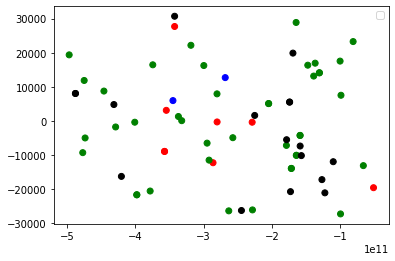

In [29]:
scatter = plt.scatter(pcaCoords[0,:],pcaCoords[1,:],c=colorVals[status])
plt.legend()
plt.show()

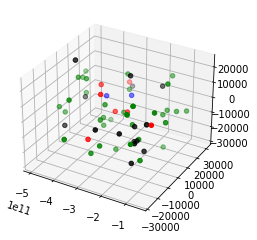

In [17]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pcaCoords[0,:],pcaCoords[1,:],pcaCoords[2,:],c=colorVals[status])
plt.show()

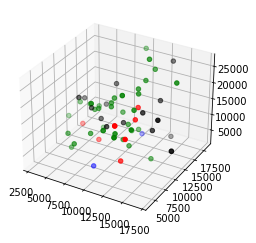

In [32]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(forceCoords[0,:],forceCoords[1,:],forceCoords[2,:],c=colorVals[status])
plt.show()

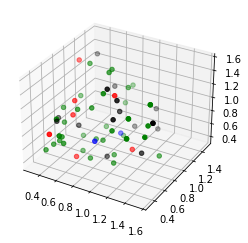

In [35]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(distCoords[0,:],distCoords[1,:],distCoords[2,:],c=colorVals[status])
plt.show()

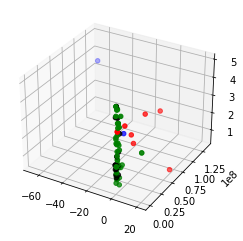

In [37]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(parameterCoords[0,:],parameterCoords[1,:],parameterCoords[2,:],c=colorVals[status])
plt.show()